## Basics of Mobile Robotics - T06  

The first section of the project involves the necessary installation of essential libraries and tools required to run the project. The commands listed are for installing various Python packages and enabling Jupyter notebook extensions.

In [11]:
!pip3 install opencv-python tqdm matplotlib numpy ipywidgets
!python3 -m jupyter nbextension enable --py widgetsnbextension
!pip3 install --upgrade tdmclient
!pip3 install rtree
!pip3 install plotly

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


We then import the various modules on python necessary to run our project as well as other functions we created for our different modules 

In [12]:
import asyncio
import time
import sys
from Computer_V import obstacle_detection
from Motion_Control import PIDController, Robot, motors_course
from Kalman_Filtering import navigate_robot_with_kalman
from Computer_V import capture_and_update_state 



Initialization of a tdmclient within a Jupyter notebook environment in order to run our Thymio

In [13]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [14]:
await tdmclient.notebook.stop()

In [15]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 15894d34-5d0e-4db8-ae70-261e10b0b8cd

In [16]:
motor_left_target= 0
motor_right_target= 0

In [17]:
@tdmclient.notebook.sync_var

def custom_wait(duration_ms):
    start_time = time.time() * 1000  # Convert current time to milliseconds
    while (time.time() * 1000 - start_time) < duration_ms:
        pass  # Do nothing and wait

# Alessio 

here


cap
1


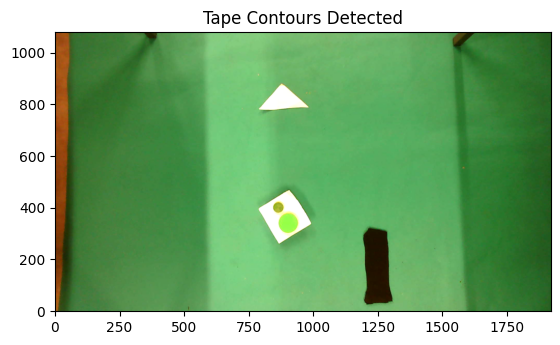

goal: 816.0 698.6666666666666
Coord. thymio fct orientation detectetion :  (881.0, 368.0)
angle :  122.34744349944202
true orientation : 
2.1353657204629966
Checking if can connect to goal at 7 samples
Could not connect to goal
Checking if can connect to goal at 23 samples
Could not connect to goal
Checking if can connect to goal at 71 samples
Can connect to goal
[(881.0, 368.0), (816.0, 698.6666666666666)]


here2
[[881.        ]
 [368.        ]
 [  2.13536572]]
nav
1
cap
2


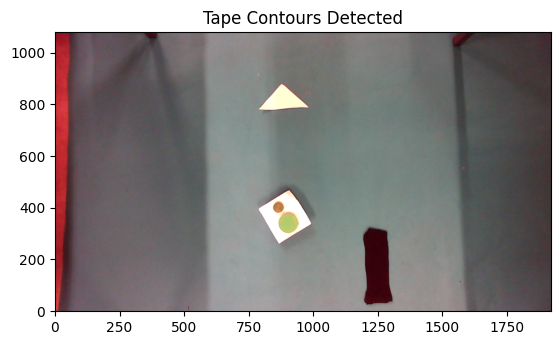

goal: 880.6666666666666 813.0
Coord. thymio fct orientation detectetion :  (881.0, 370.0)
angle :  122.34744349944202
true orientation : 
2.1353657204629966
pid:
881.0
368.0
2.1353657204629966
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
x_est : 
[[881.        ]
 [368.        ]
 [  2.13536572]]
cap
3


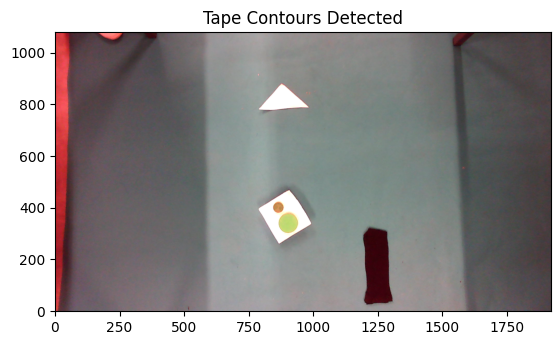

goal: 205.33333333333334 1072.3333333333333
Coord. thymio fct orientation detectetion :  (881.0, 369.0)
angle :  121.50426671920418
true orientation : 
2.1206495094714812
CRAZY
error :
336.9947246537317
nav
2
cap
4


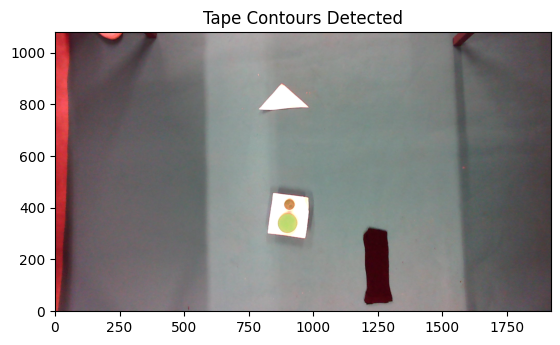

goal: 207.66666666666666 1073.0
Coord. thymio fct orientation detectetion :  (901.0, 374.0)
angle :  85.23635830927383
true orientation : 
1.4876550949064553
cap
5


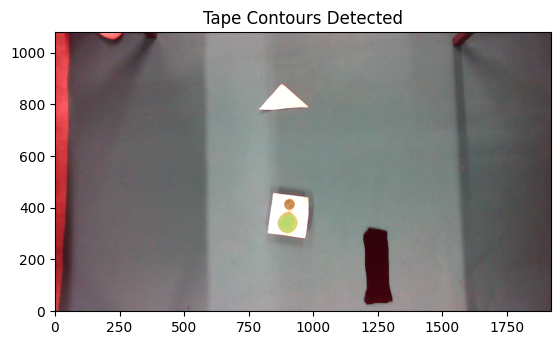

goal: 205.33333333333334 1073.0
Coord. thymio fct orientation detectetion :  (902.0, 374.0)
angle :  83.6598082540901
true orientation : 
1.460139105621001
pid:
881.0
368.0
1.7648941294432627
[[1.01 0.   0.  ]
 [0.   1.01 0.  ]
 [0.   0.   1.01]]
x_est : 
[[881.        ]
 [368.        ]
 [  1.76489413]]
error :
306.9947246537317
nav
3
cap
6


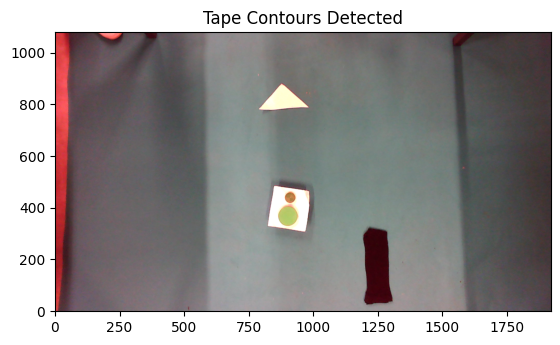

goal: 205.66666666666666 1073.0
Coord. thymio fct orientation detectetion :  (904.0, 401.0)
angle :  83.48019824834302
true orientation : 
1.4570043196511886
cap
7


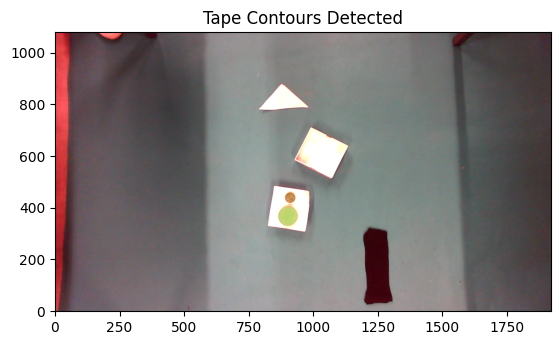

goal: 201.33333333333334 1073.6666666666667
Coord. thymio fct orientation detectetion :  (904.0, 401.0)
angle :  83.48019824834302
true orientation : 
1.4570043196511886


TypeError: unsupported operand type(s) for &: 'float' and 'int'

In [18]:

robot_state = {
        'position': None,
        'orientation': None,
        'waypoints': None
 }
    
async def main():
    # Initialize your robot and PID controller
    robot1 = Robot()
    kp, ki, kd = 1, 0, 0
    dt=1
    d=0

    measurement_interval= 5
    orientation_pid = PIDController(kp, ki, kd)

    # Set up the task for capturing frames and updating the state
    print('here')
    capture_task = asyncio.create_task(capture_and_update_state(d,robot_state))
    try:
        while True:
            # Check if waypoints are available
            if robot_state.get('waypoints'):
                # Navigate the robot towards each waypoint
                for waypoint in robot_state['waypoints']:
                    # Update the target position for the navigation
                    # Call the navigation function with the updated targe
                    print('here2')
                    await navigate_robot_with_kalman(robot1, orientation_pid, waypoint, dt, measurement_interval,d,node,robot_state, client)
                sys.exit()
            # Add a small delay to avoid running the loop too fast
            await asyncio.sleep(0.1)
            
    
    finally:
        # Cancel the capture task when main loop is stopped
        capture_task.cancel()


await main()
